<a href="https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/preprocessing/hru_discretization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
This notebook describes hru discretization for any catchment using shapefiles.

In [1]:

import os

from ai4water.preprocessing import MakeHRUs
from ai4water.utils.utils import get_version_info


D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for lib,ver in get_version_info().items():
    print(lib, ver)  # print versions of the libraries used

python 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.06
lightgbm 3.3.1
tcn 3.4.0
catboost 0.26
xgboost 1.5.0
easy_mpl 0.21.3
SeqMetrics 1.3.3
tensorflow 2.7.0
keras.api._v2.keras 2.7.0
numpy 1.21.0
pandas 1.3.4
matplotlib 3.4.3
h5py 3.5.0
sklearn 1.0.1
shapefile 2.3.0
xarray 0.20.1
netCDF4 1.5.7
optuna 2.10.1
skopt 0.9.0
hyperopt 0.2.7
plotly 5.3.1
lime NotDefined
seaborn 0.11.2


In [3]:

shapefile_paths = os.path.join(os.getcwd(), 'shapefiles')
assert os.path.exists(shapefile_paths)
assert len(os.listdir(shapefile_paths))>=35

In [4]:
Soil_shp = os.path.join(shapefile_paths, 'soil.shp')

SubBasin_shp = os.path.join(shapefile_paths, 'sub_basins.shp')
slope_shp = os.path.join(shapefile_paths, 'slope.shp')

years = {2011: {'shapefile': os.path.join(shapefile_paths, 'lu2011.shp'), 'feature': 'NAME'},
         2012: {'shapefile': os.path.join(shapefile_paths, 'lu2012.shp'), 'feature': 'NAME'},
         2013: {'shapefile': os.path.join(shapefile_paths, 'lu2013.shp'), 'feature': 'NAME'},
         2014: {'shapefile': os.path.join(shapefile_paths, 'lu2014.shp'), 'feature': 'NAME'},
         # 2015:"D:\\Laos\\data\\landuse\\shapefiles\\LU2015.shp"
         }

### `unique_sub`

The simplest case, where the HRU is formed by subbaisns.

Checking validity of landuse shapefile


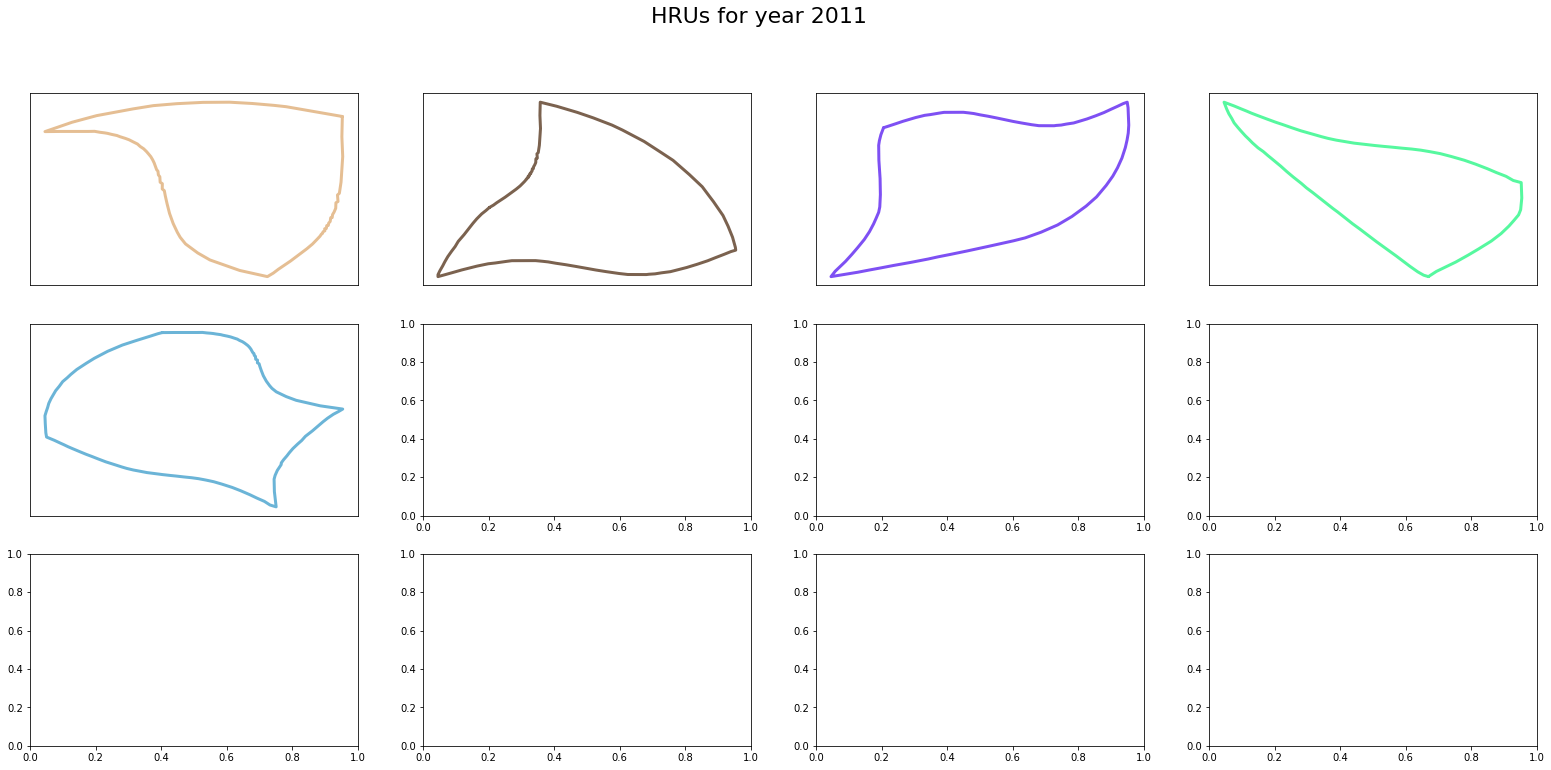

Checking validity of landuse shapefile


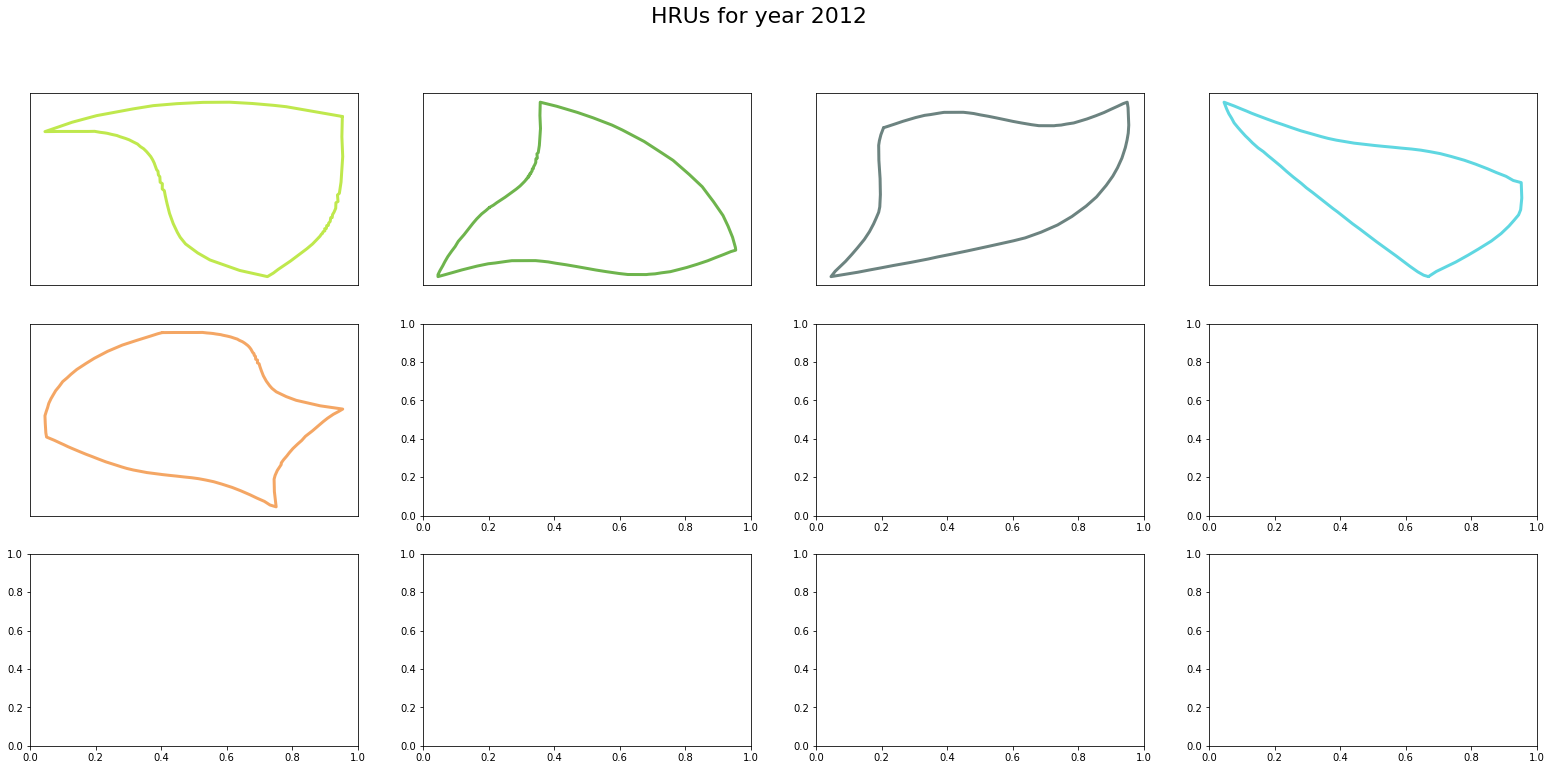

Checking validity of landuse shapefile


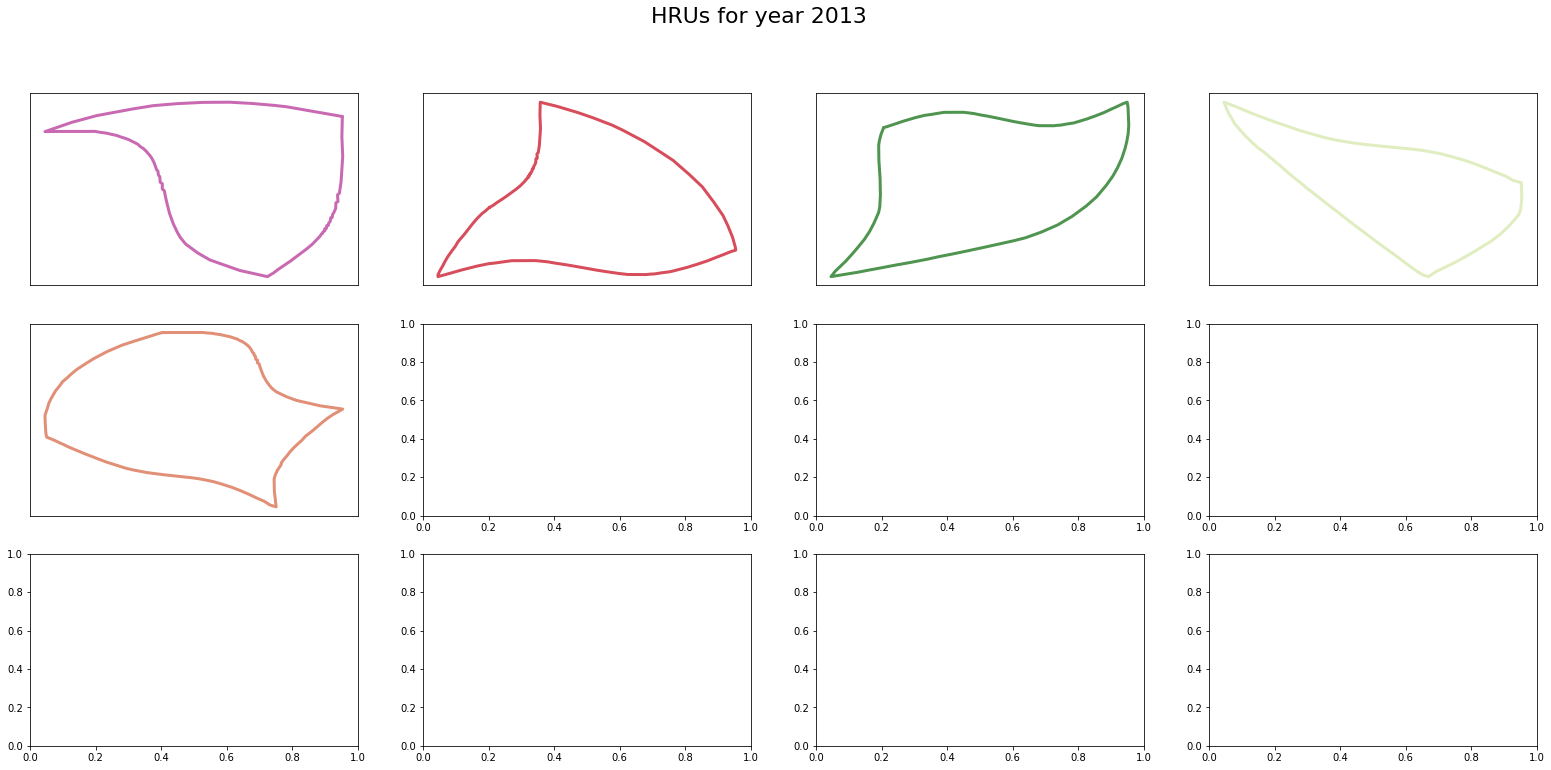

Checking validity of landuse shapefile


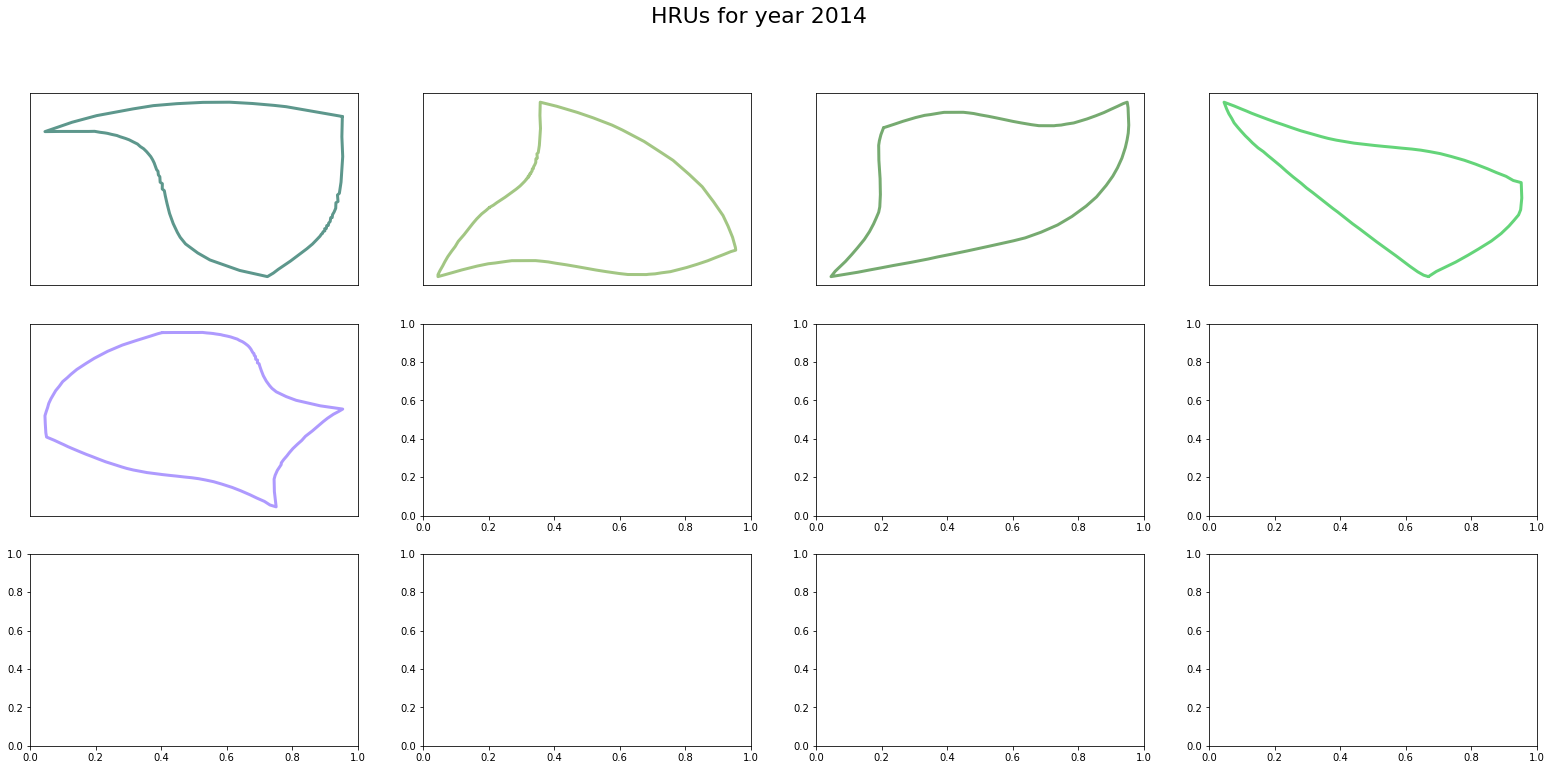

In [5]:
hru_object = MakeHRUs('unique_sub',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      subbasins_shape={'shapefile': SubBasin_shp, 'feature': 'id'}, 
                     )

hru_object.call(plot_hrus=True)


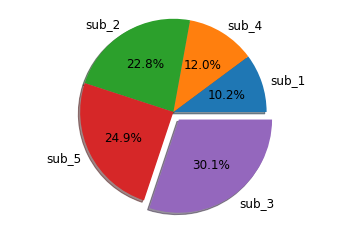

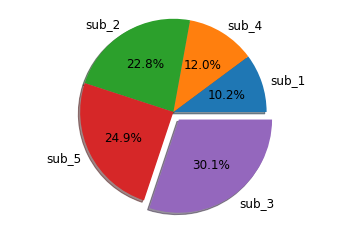

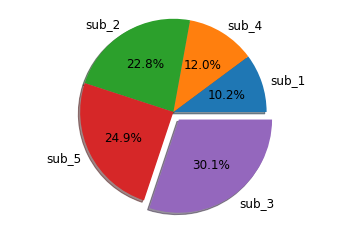

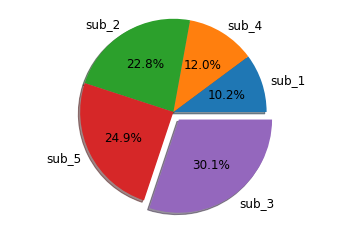

In [6]:
for yr in years:
    hru_object.draw_pie(yr, title=False, n_merge=0, textprops={'fontsize': '12'})


AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.


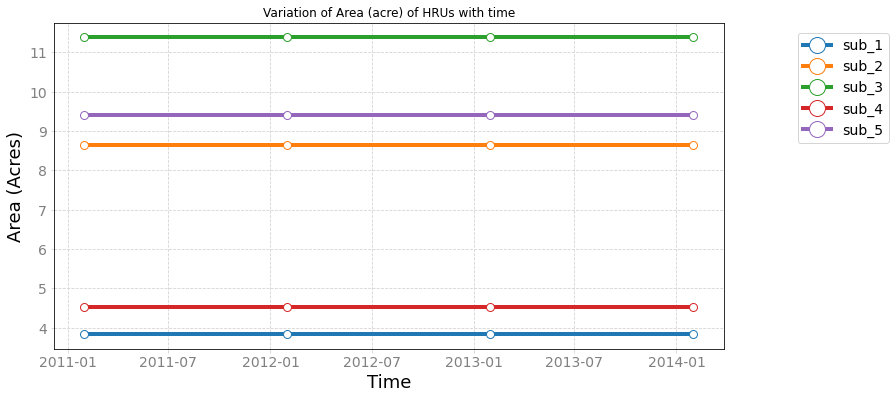

In [7]:
_ = hru_object.plot_as_ts(min_xticks=3, max_xticks=4)


### `unique_soil`

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


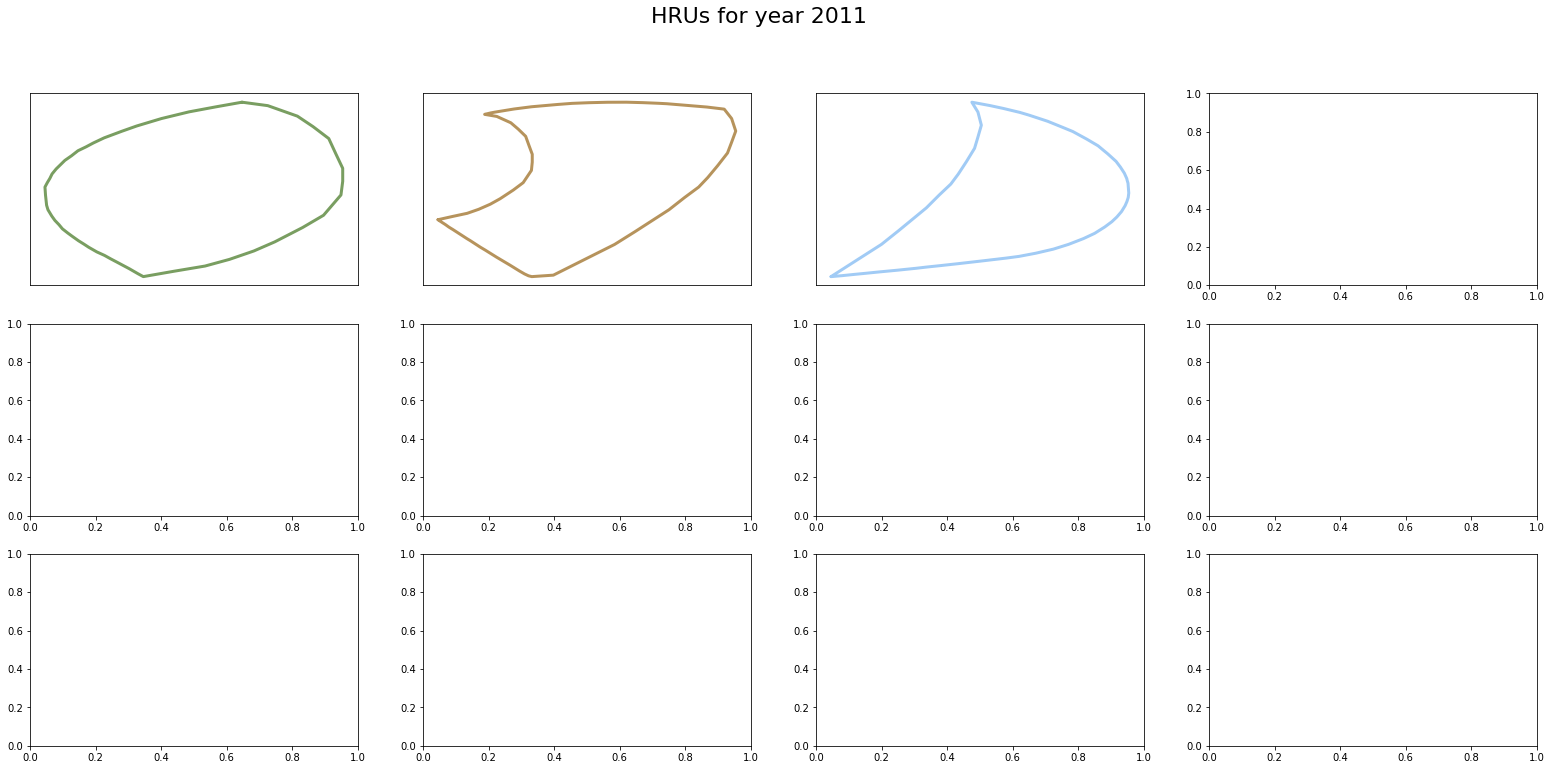

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


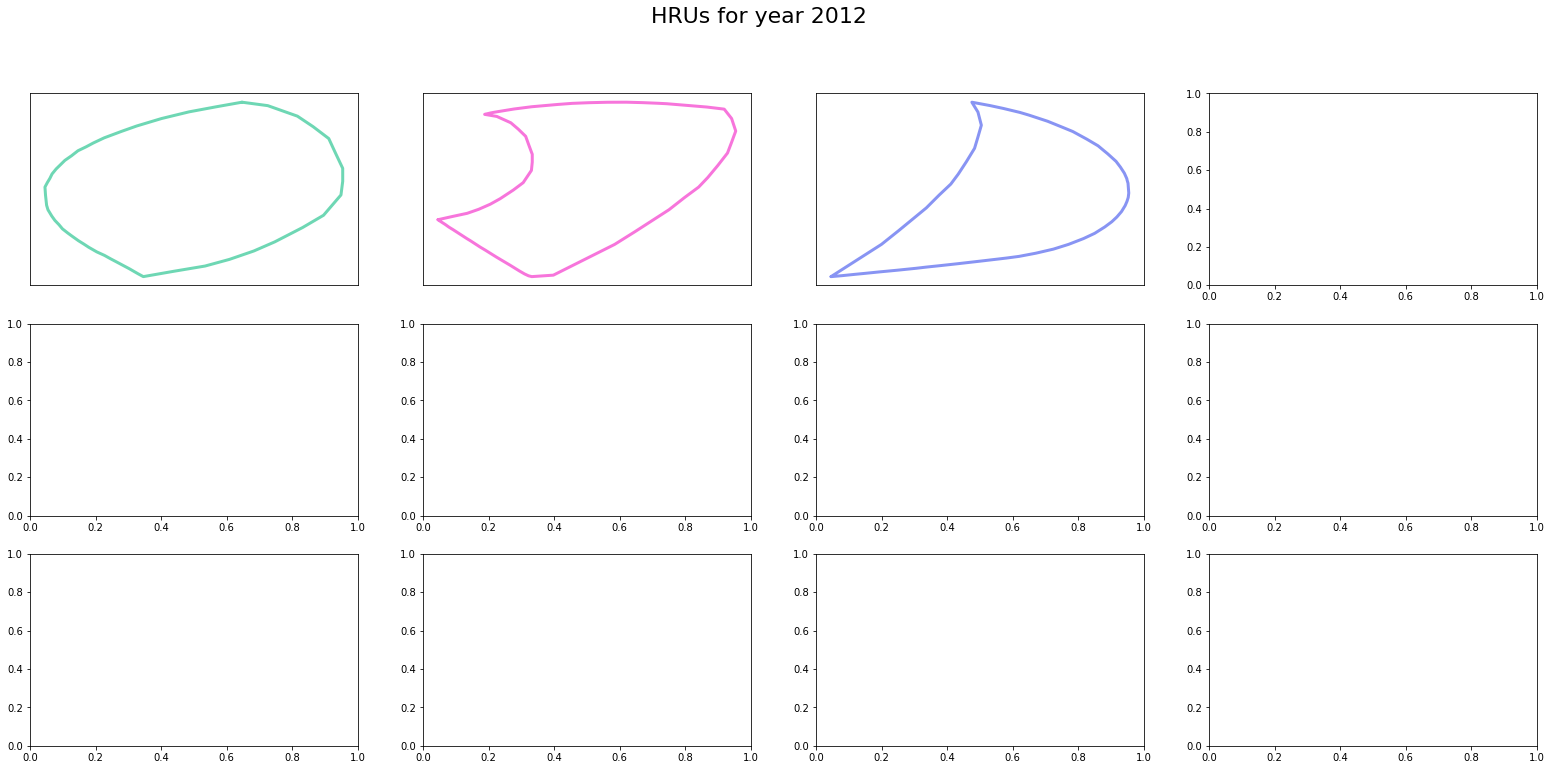

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


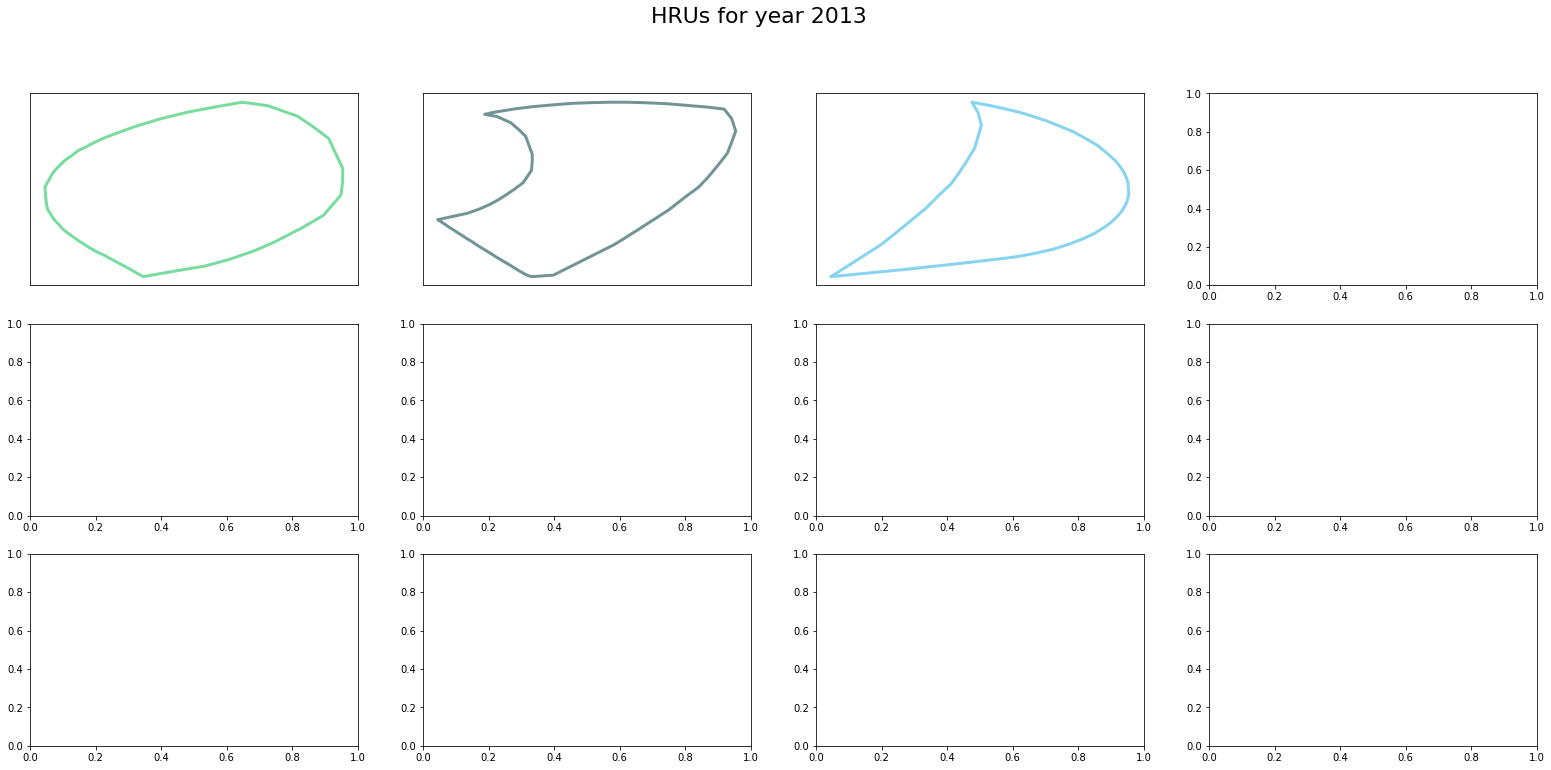

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


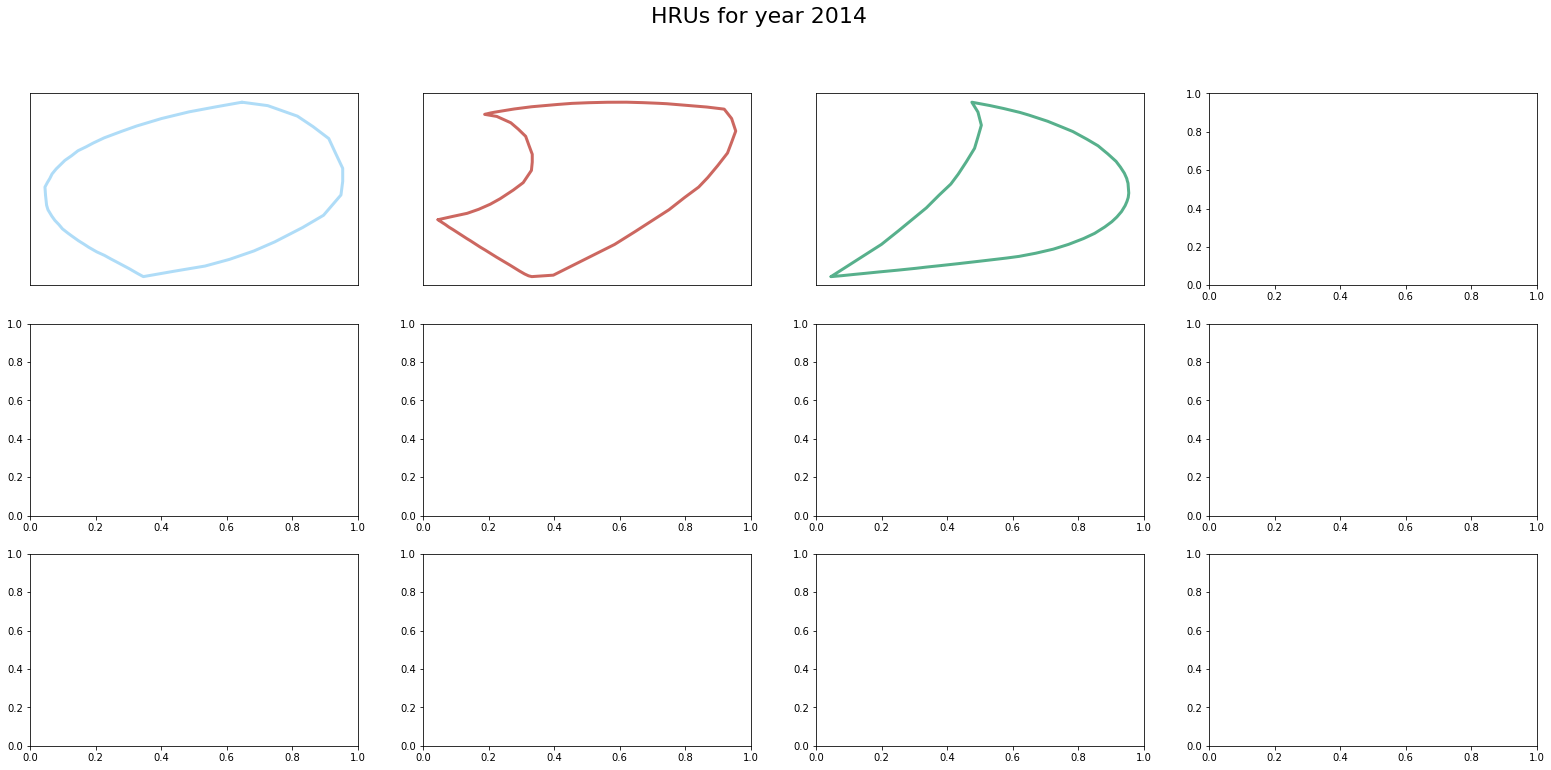

In [8]:
hru_object = MakeHRUs('unique_soil',
                      index={2011: None, 2012: None, 2013:None, 2014:None}, 
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'}
                     )

hru_object.call(plot_hrus=True)

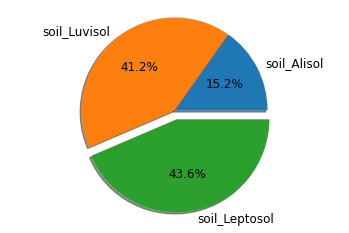

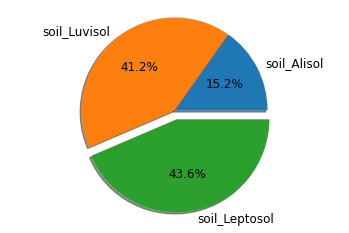

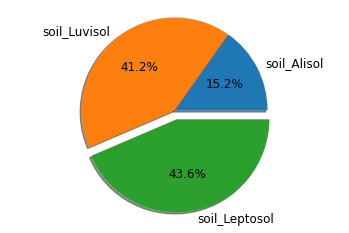

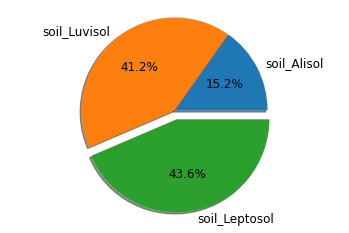

In [9]:
for yr in years:
    hru_object.draw_pie(yr, title=False, textprops={'fontsize': '12'})

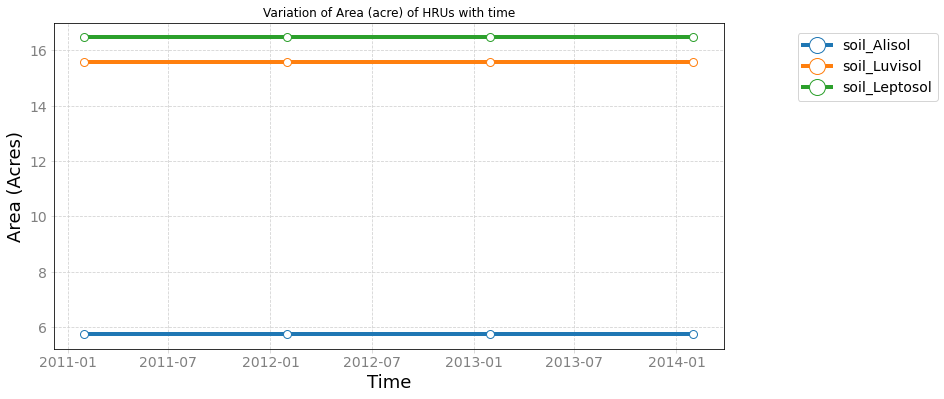

<AxesSubplot:title={'center':'Variation of Area (acre) of HRUs with time'}, xlabel='Time', ylabel='Area (Acres)'>

In [10]:
hru_object.plot_as_ts(min_xticks=3, max_xticks=4)

### `unique_lu`
Since the land use varies with time, we will include it in index.

Checking validity of landuse shapefile
lu 0 is valid now
lu 1 is valid now
lu 2 is valid now
lu 3 is valid now


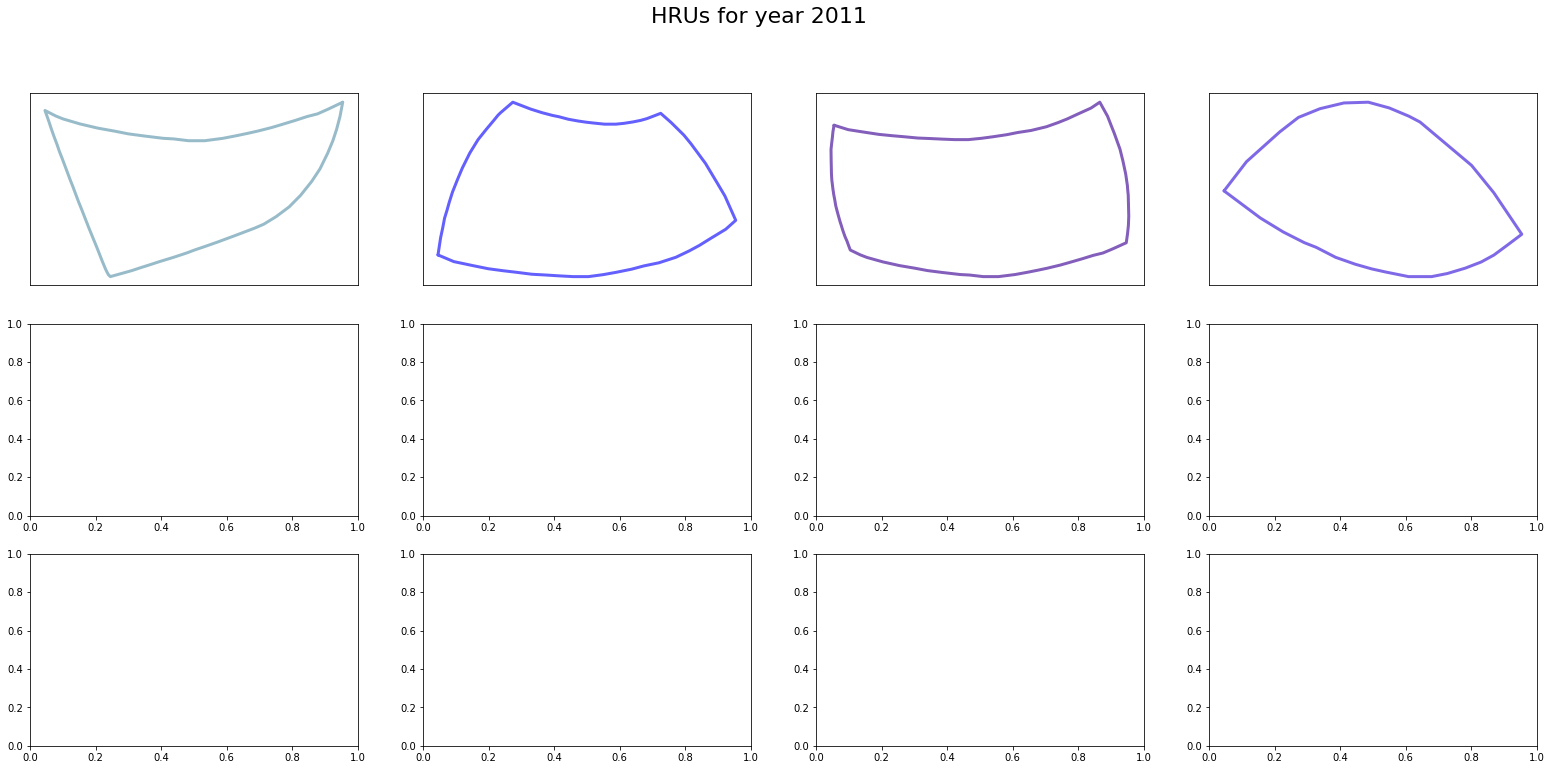

Checking validity of landuse shapefile
lu 0 is valid now
lu 1 is valid now
lu 2 is valid now
lu 3 is valid now


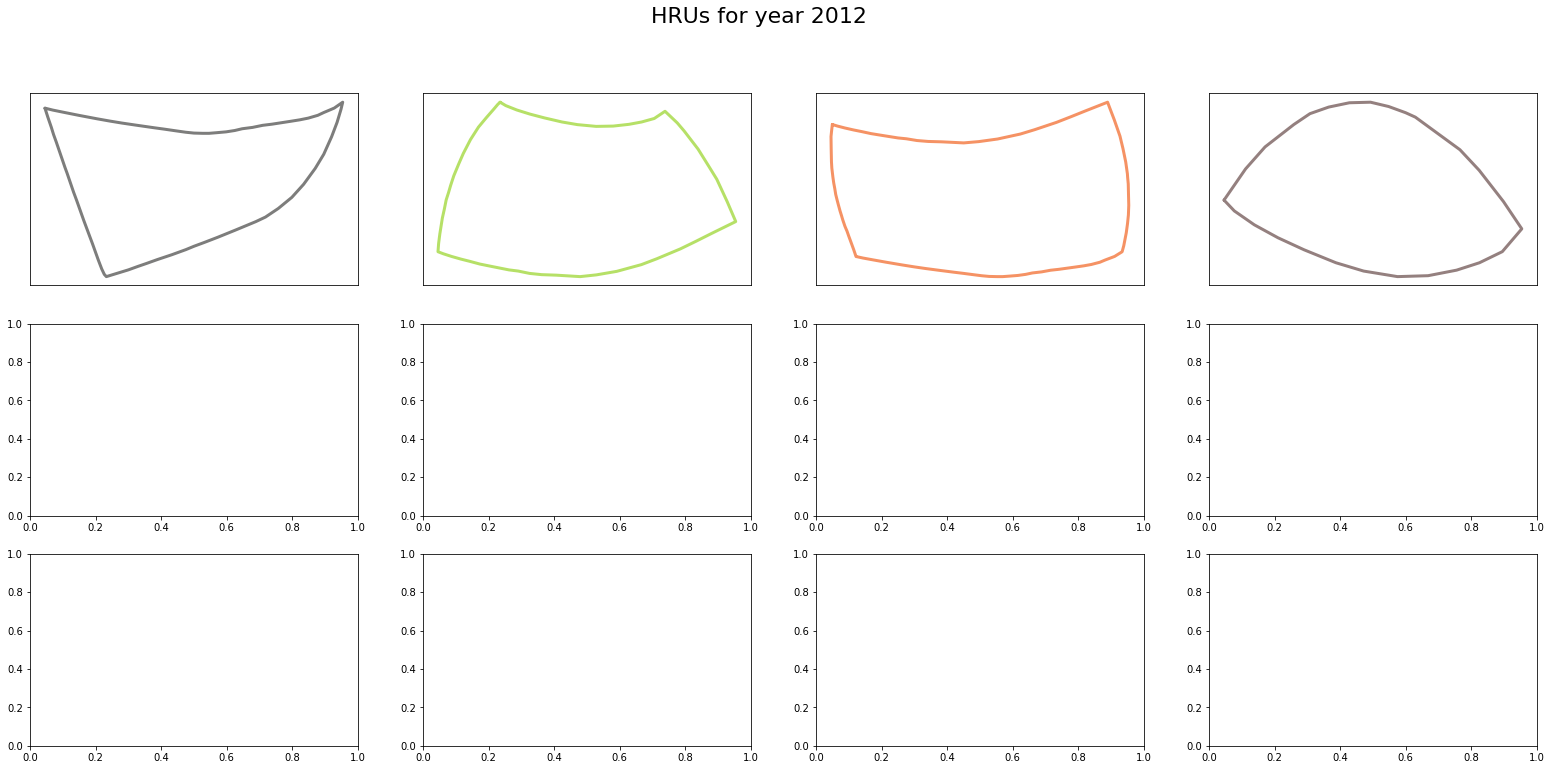

Checking validity of landuse shapefile
lu 0 is valid now
lu 1 is valid now
lu 2 is valid now
lu 3 is valid now


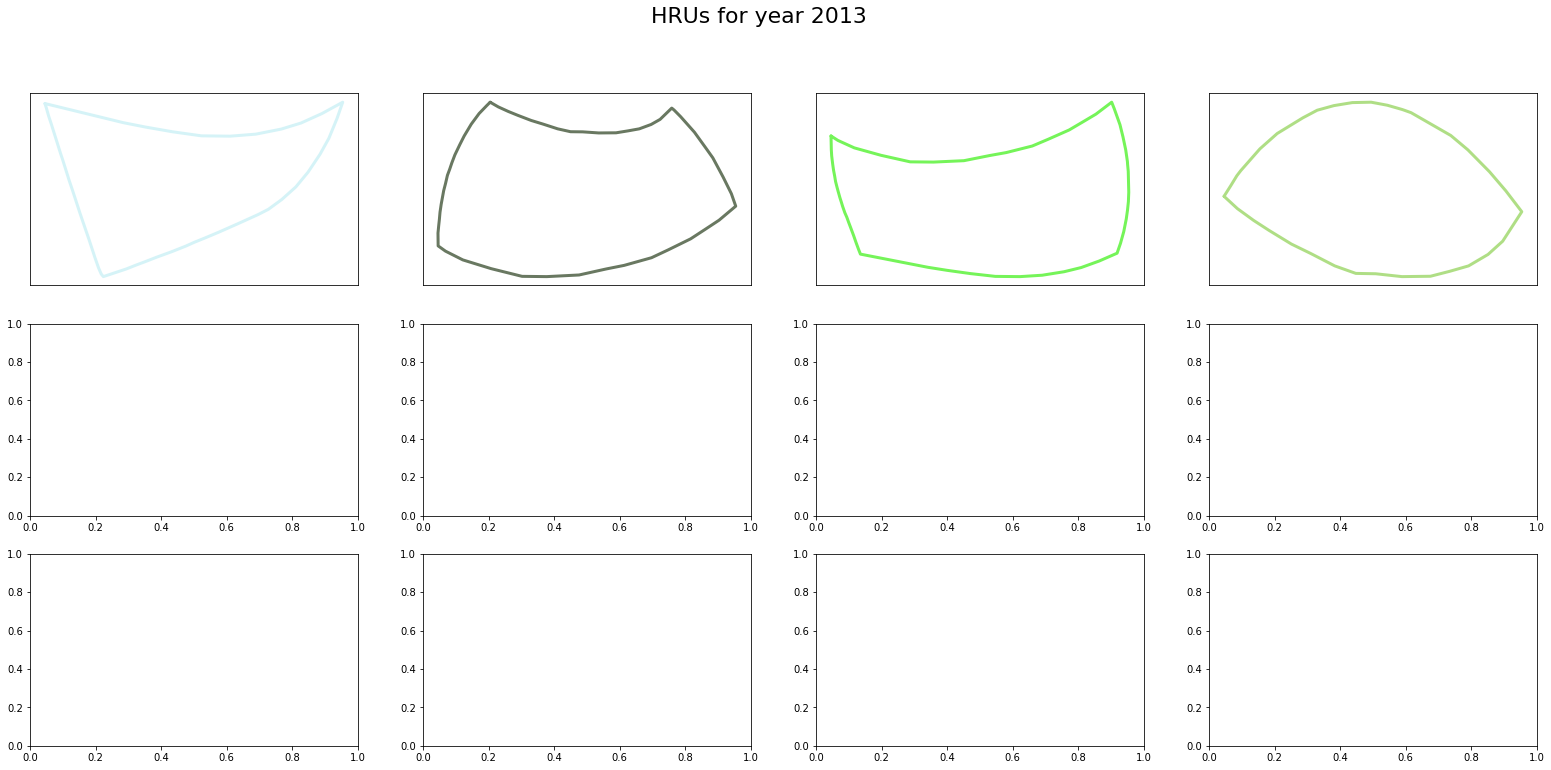

Checking validity of landuse shapefile
lu 0 is valid now
lu 1 is valid now
lu 2 is valid now
lu 3 is valid now


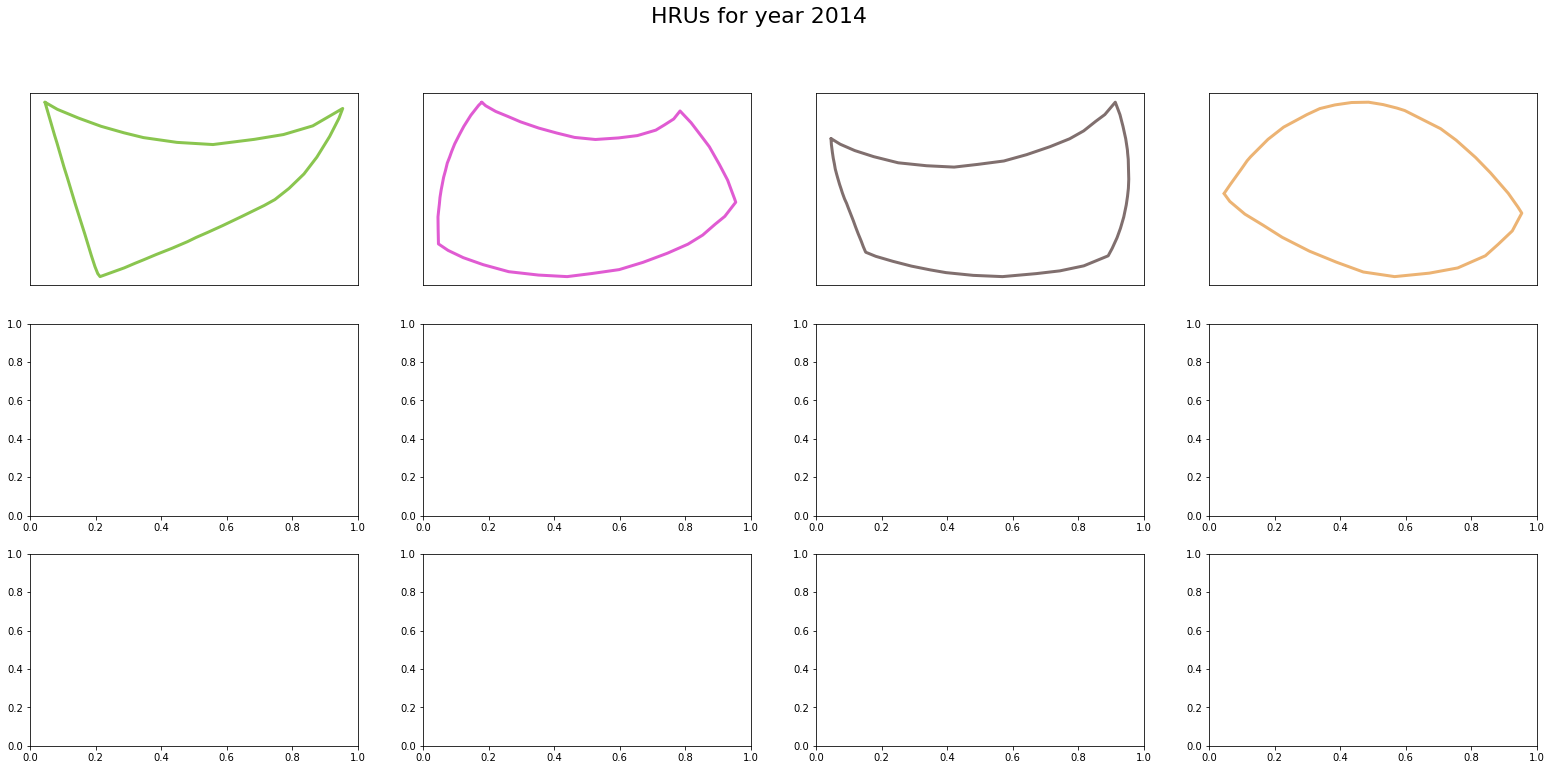

In [11]:
hru_object = MakeHRUs('unique_lu',
                      index=years,
                     )

hru_object.call(plot_hrus=True)

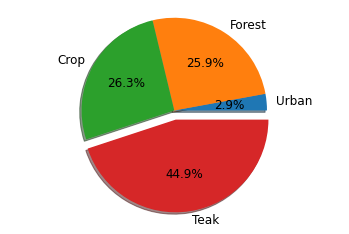

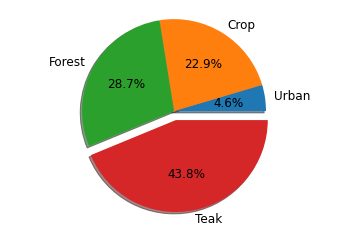

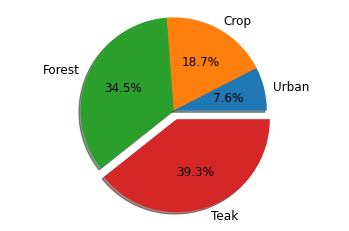

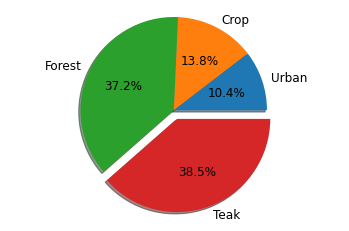

In [12]:
for yr in years:
    hru_object.draw_pie(yr, title=False, textprops={'fontsize': '12'})

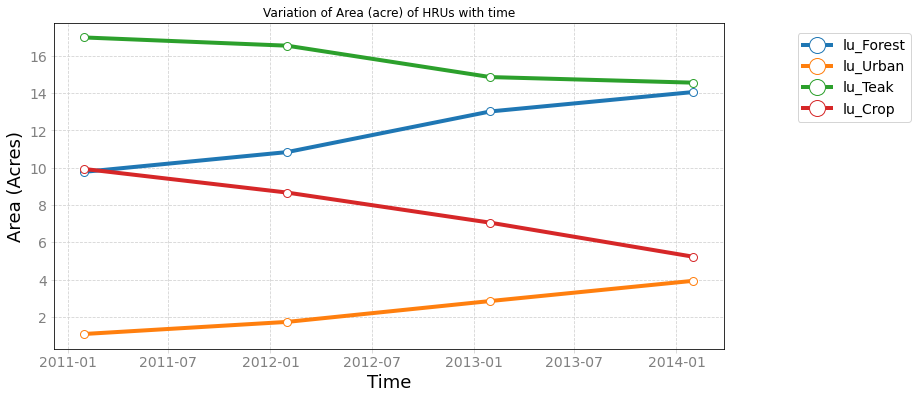

In [13]:
_ = hru_object.plot_as_ts(min_xticks=3, max_xticks=4)

### `unique_slope`

Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now


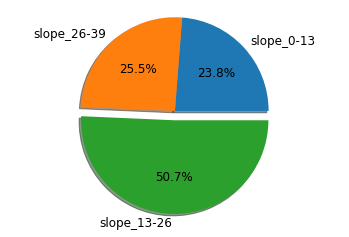

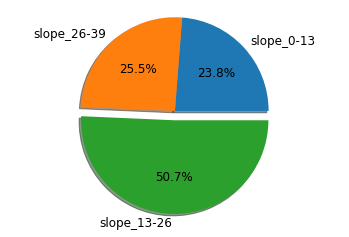

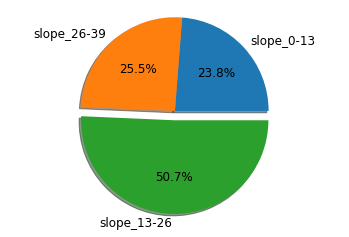

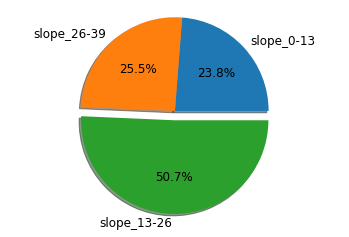

In [14]:
hru_object = MakeHRUs('unique_slope',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'}
                     )

hru_object.call(plot_hrus=False)
for yr in years:
    hru_object.draw_pie(yr, title=False, textprops={'fontsize': '12'})

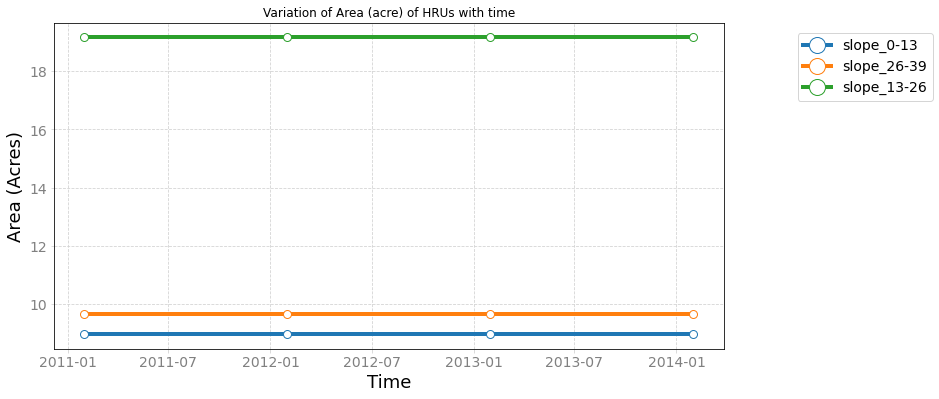

In [15]:
_ = hru_object.plot_as_ts(min_xticks=3, max_xticks=4)

### `unique_lu_sub`

In [16]:
hru_object = MakeHRUs('unique_lu_sub',
                      index=years,
                      subbasins_shape={'shapefile': SubBasin_shp, 'feature': 'id'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile


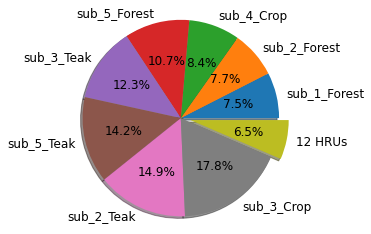

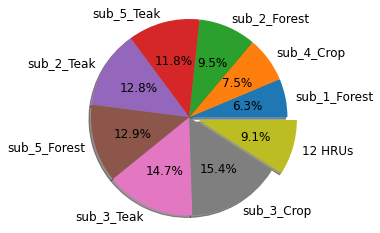

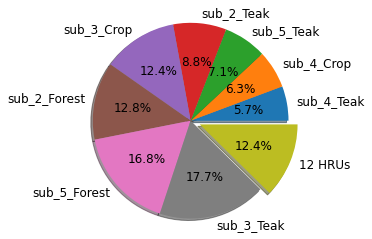

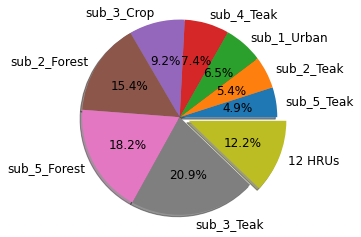

In [17]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=12, title=False, textprops={'fontsize': '12'})

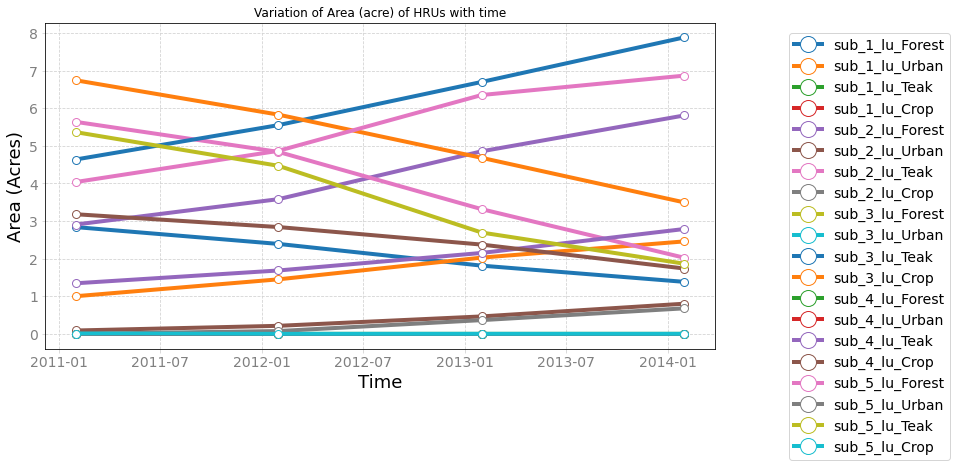

In [18]:
_ = hru_object.plot_as_ts(min_xticks=3, max_xticks=4)

### `unique_lu_soil`
combination of land use and soil

In [19]:
hru_object = MakeHRUs('unique_lu_soil',
                      index=years,
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


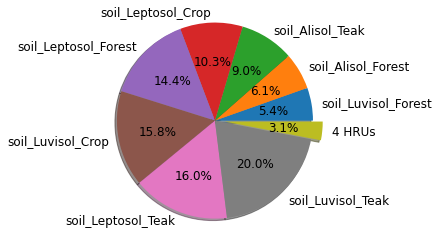

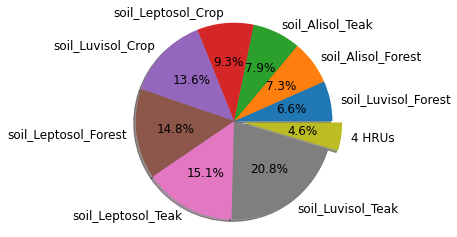

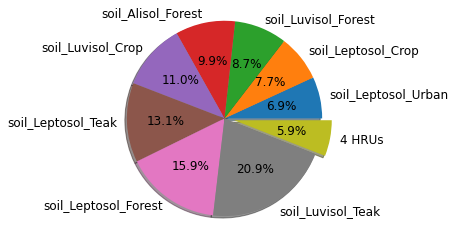

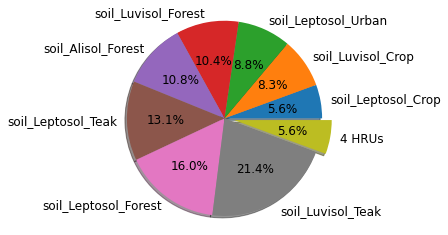

In [20]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=4, title=False, textprops={'fontsize': '12'})

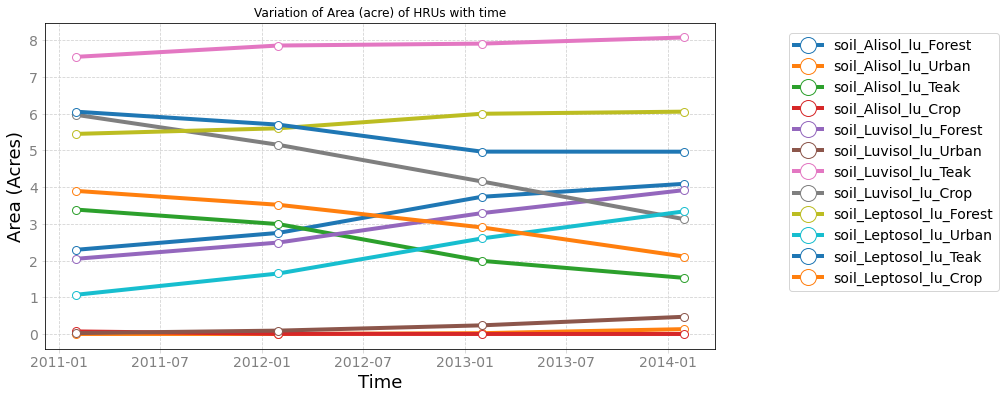

In [21]:
_ = hru_object.plot_as_ts(min_xticks=3, max_xticks=4)

### `unique_lu_slope`

In [22]:
hru_object = MakeHRUs('unique_lu_slope',
                      index=years,
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now


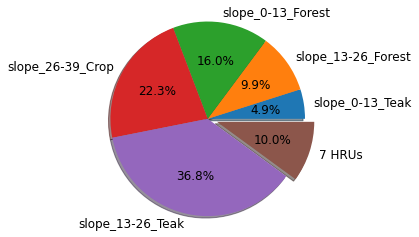

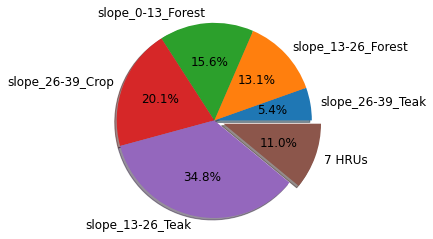

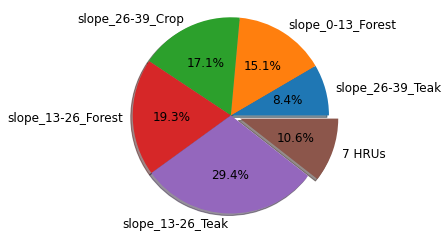

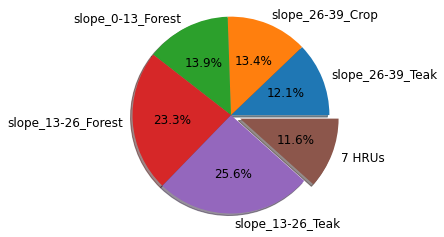

In [23]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=7, title=False, textprops={'fontsize': '12'})

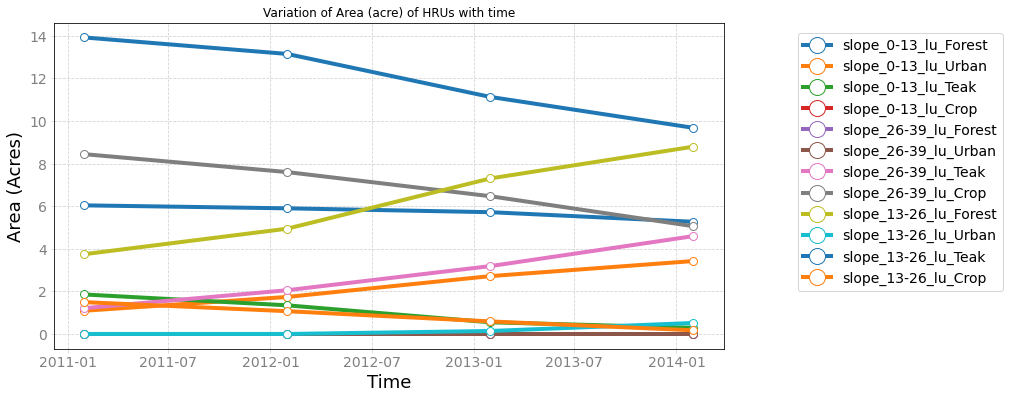

In [24]:
_ = hru_object.plot_as_ts(min_xticks=3, max_xticks=4)

### `unique_soil_sub`
combination of soil type and sub-basin

In [25]:
hru_object = MakeHRUs('unique_soil_sub',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      subbasins_shape={'shapefile': SubBasin_shp, 'feature': 'id'},
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile


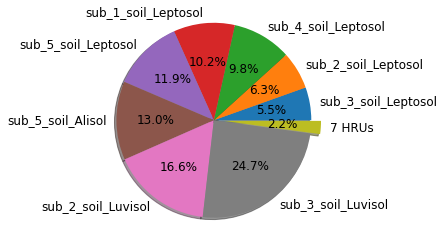

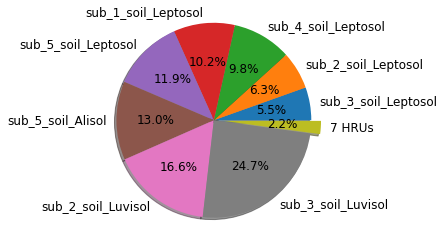

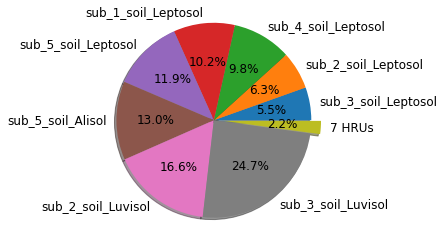

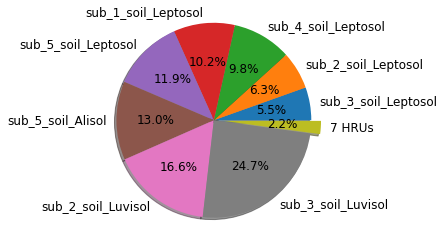

In [26]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=7, title=False, textprops={'fontsize': '12'})

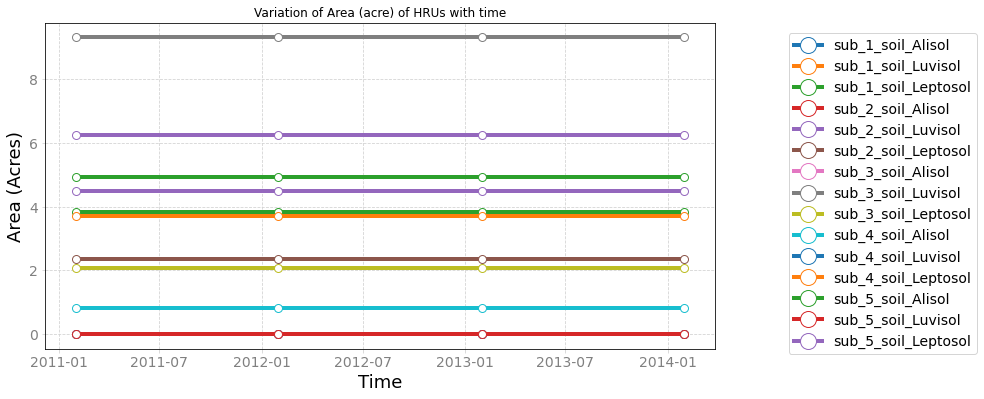

In [27]:
_ = hru_object.plot_as_ts(min_xticks=3, max_xticks=4)

### `unique_soil_slope`
combination of soil types and slope categories

In [28]:
hru_object = MakeHRUs('unique_soil_slope',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'},
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now
Checking validity of landuse shapefile
slope 0 is valid now
slope 1 is valid now
slope 2 is valid now


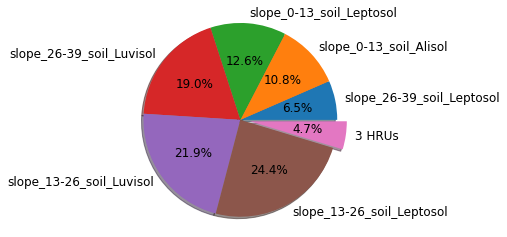

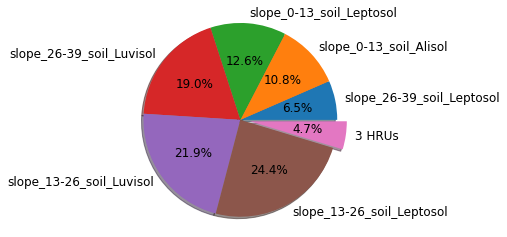

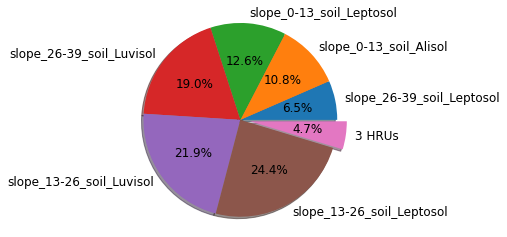

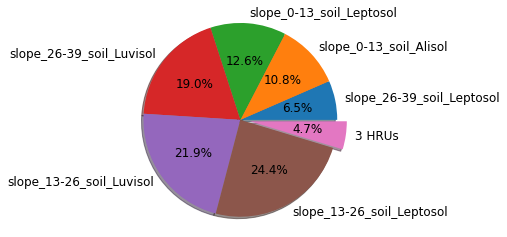

In [29]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=3, title=False, textprops={'fontsize': '12'})

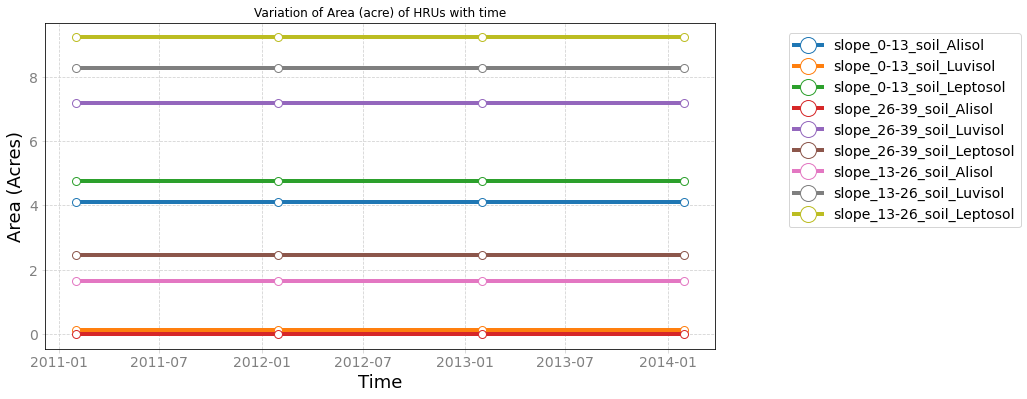

In [30]:
_ = hru_object.plot_as_ts(min_xticks=3, max_xticks=4)

### `unique_slope_sub`
combination of slope categories and sub-basins

In [31]:
hru_object = MakeHRUs('unique_slope_sub',
                      index={2011: None, 2012: None, 2013:None, 2014:None},
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'},
                      subbasins_shape={'shapefile': SubBasin_shp, 'feature': 'id'}
                     )

hru_object.call(False)

Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile
Checking validity of landuse shapefile


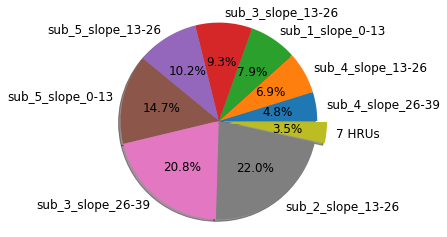

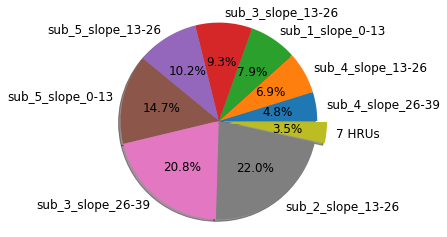

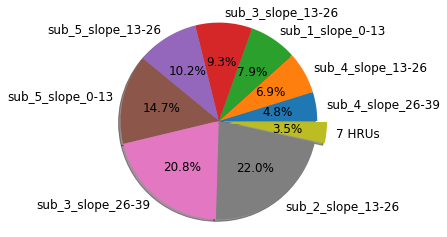

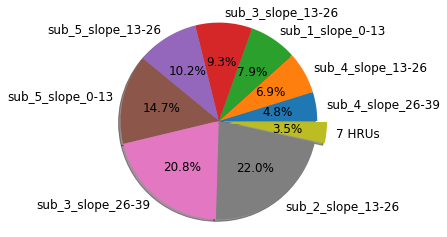

In [32]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=7, title=False, textprops={'fontsize': '12'})

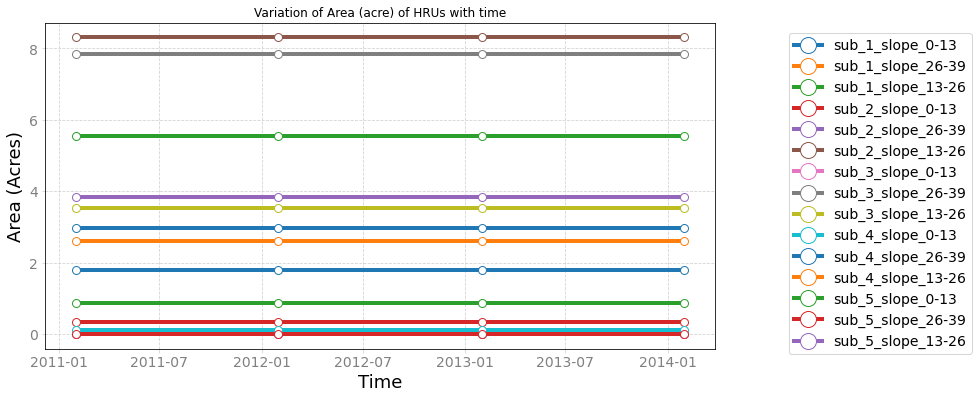

In [33]:
_ = hru_object.plot_as_ts(min_xticks=3, max_xticks=4)

### `unique_lu_soil_slope`
combination of land use, soil and slope.

In [34]:
hru_object = MakeHRUs('unique_lu_soil_slope',
                      index=years,
                      slope_shape={'shapefile': slope_shp, 'feature': 'percent'},
                      soil_shape={'shapefile': Soil_shp, 'feature': 'NAME'},
                     )

hru_object.call(False)

Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now
Checking validity of landuse shapefile
soil 0 is valid now
soil 1 is valid now
soil 2 is valid now


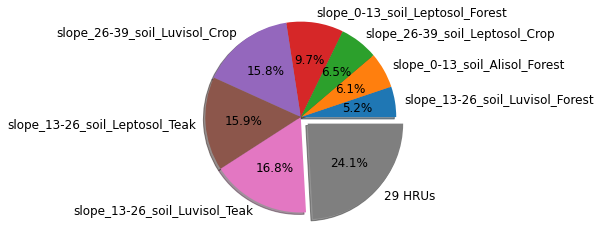

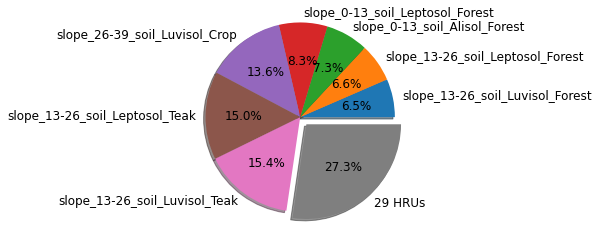

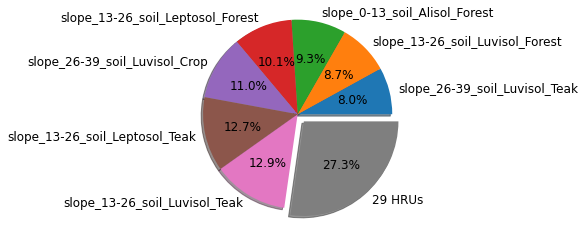

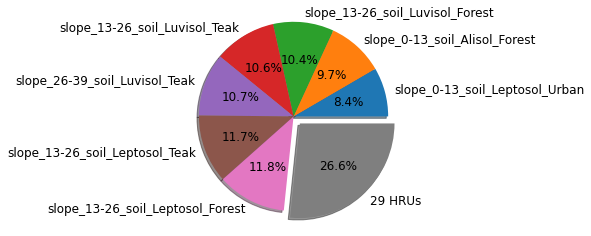

In [35]:
for yr in years:
    hru_object.draw_pie(yr, n_merge=29, title=False, textprops={'fontsize': '12'})

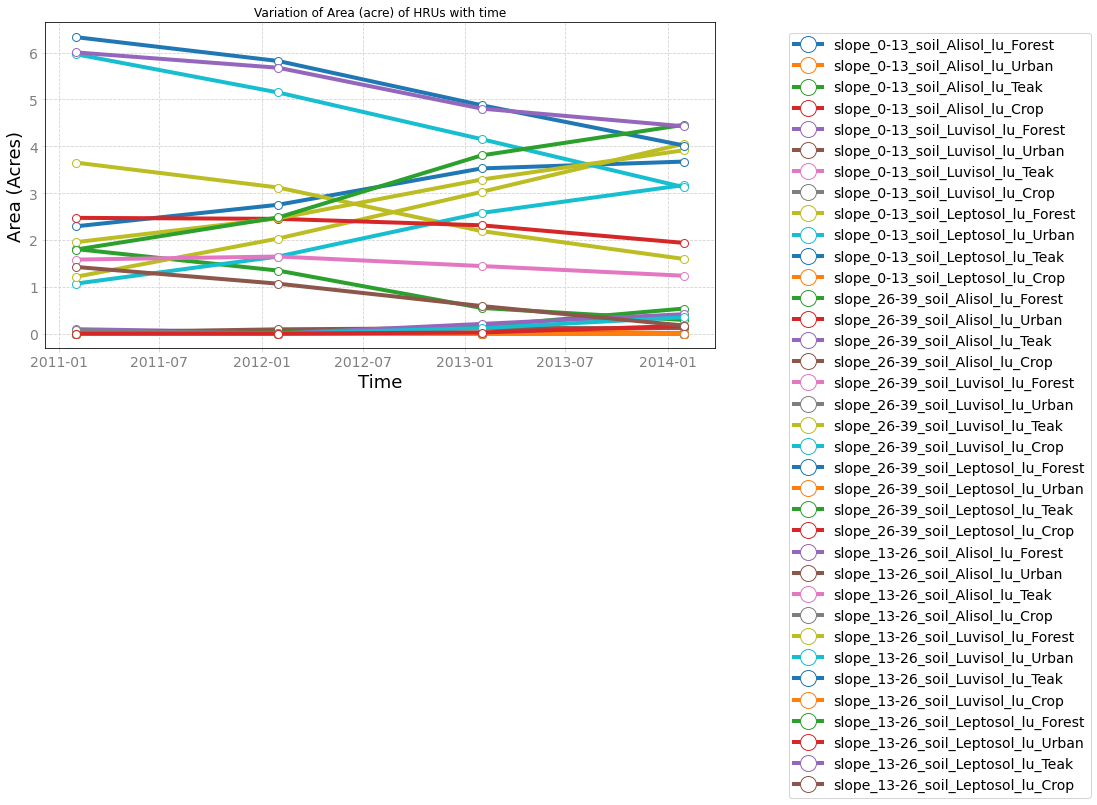

In [36]:
_ = hru_object.plot_as_ts(min_xticks=3, max_xticks=4)